In [3]:
import numpy as np
import matplotlib
import cv2
import matplotlib.pyplot as plt


In [4]:
img = cv2.imread('/home/sairaj/Desktop/CODING(main folder)/main/Python/ML/ML/Projects/Sports Person Classifier/model/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

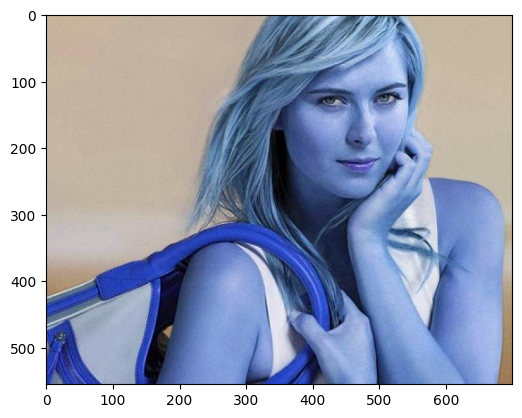

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [7]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], shape=(555, 700), dtype=uint8)

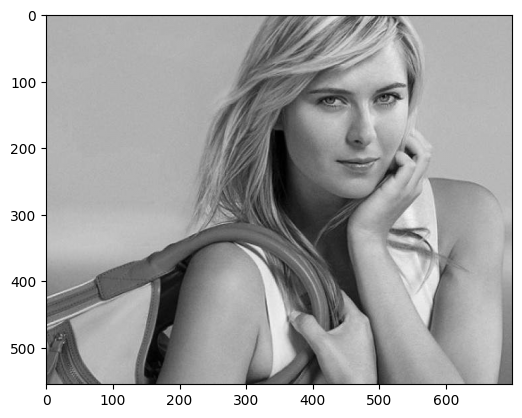

In [ ]:
plt.imshow(gray , cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

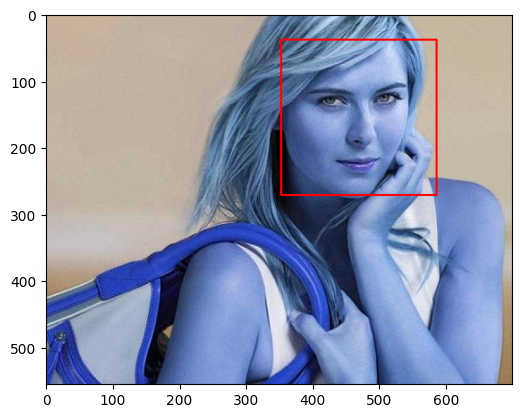

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

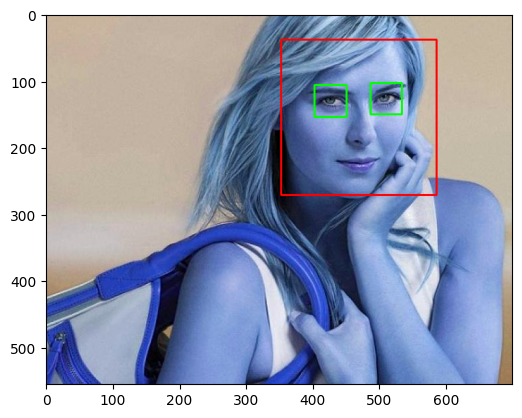

In [20]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

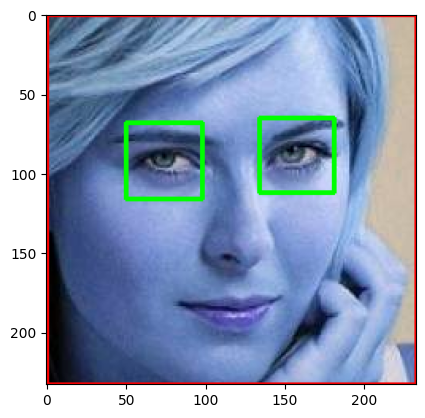

In [25]:
plt.imshow(roi_color , cmap='gray')


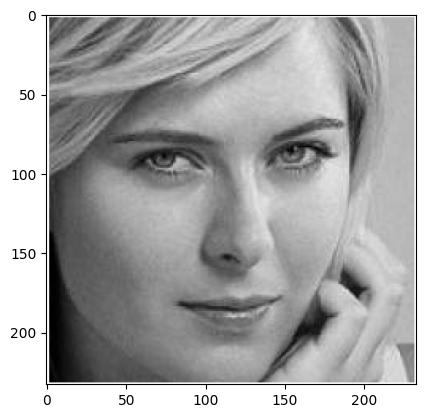

In [26]:
plt.imshow(roi_gray , cmap='gray')

In [28]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [52]:
cropped_img = get_cropped_image_if_2_eyes('/home/sairaj/Desktop/CODING(main folder)/main/Python/ML/ML/Projects/Sports Person Classifier/model/test_images/sharapova1.JPG')
cropped_img

[ WARN:0@5649.297] global loadsave.cpp:268 findDecoder imread_('/home/sairaj/Desktop/CODING(main folder)/main/Python/ML/ML/Projects/Sports Person Classifier/model/test_images/sharapova1.JPG'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [30]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [32]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [33]:
img_dirs

['./dataset/serena_williams',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/virat_kohli',
 './dataset/lionel_messi']

In [35]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [41]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi


## (3) Preprocessing: Use wavelet transform as a feature for traning our model

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

Wavelet transform

In [54]:
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [55]:
cropped_img = get_cropped_image_if_2_eyes('/home/sairaj/Desktop/CODING(main folder)/main/Python/ML/ML/Projects/Sports Person Classifier/model/test_images/sharapova1.jpg')
cropped_img

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

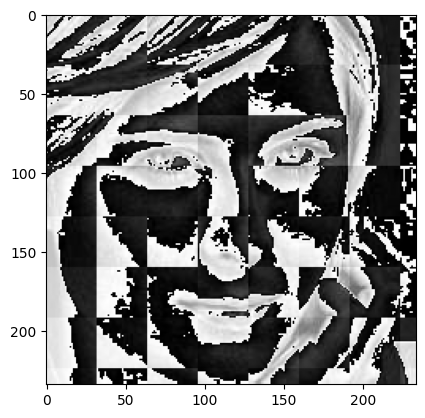

In [56]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')


In [57]:
celebrity_file_names_dict

{'serena_williams': ['./dataset/cropped/serena_williams/serena_williams1.png',
  './dataset/cropped/serena_williams/serena_williams2.png',
  './dataset/cropped/serena_williams/serena_williams3.png',
  './dataset/cropped/serena_williams/serena_williams4.png',
  './dataset/cropped/serena_williams/serena_williams5.png',
  './dataset/cropped/serena_williams/serena_williams6.png',
  './dataset/cropped/serena_williams/serena_williams7.png',
  './dataset/cropped/serena_williams/serena_williams8.png',
  './dataset/cropped/serena_williams/serena_williams9.png',
  './dataset/cropped/serena_williams/serena_williams10.png',
  './dataset/cropped/serena_williams/serena_williams11.png',
  './dataset/cropped/serena_williams/serena_williams12.png',
  './dataset/cropped/serena_williams/serena_williams13.png',
  './dataset/cropped/serena_williams/serena_williams14.png',
  './dataset/cropped/serena_williams/serena_williams15.png',
  './dataset/cropped/serena_williams/serena_williams16.png',
  './dataset/c

In [58]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'serena_williams': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'virat_kohli': 3,
 'lionel_messi': 4}

## Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [60]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

[ WARN:0@6364.671] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams4.png'): can't open/read file: check file path/integrity
[ WARN:0@6364.671] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams5.png'): can't open/read file: check file path/integrity
[ WARN:0@6364.671] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams6.png'): can't open/read file: check file path/integrity
[ WARN:0@6364.671] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams7.png'): can't open/read file: check file path/integrity
[ WARN:0@6364.684] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams10.png'): can't open/read file: check file path/integrity
[ WARN:0@6364.686] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams12.png'): can't open/read file: chec

In [61]:
len(X)

164

In [ ]:
len(X[0])  #   =4096 = 32*32*3 + 32*32

4096

In [63]:
X[0]

array([[ 42],
       [ 51],
       [ 61],
       ...,
       [248],
       [232],
       [ 27]], shape=(4096, 1), dtype=uint8)

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)   # while training a model it is better to convert integers to float
X.shape

(164, 4096)

In [65]:
X[0]

array([ 42.,  51.,  61., ..., 248., 232.,  27.], shape=(4096,))

## Data cleaning process is done. Now we are ready to train our model

In [66]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8292682926829268

In [69]:
print(classification_report(y_test , pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.70      0.88      0.78         8
           2       0.67      0.67      0.67         3
           3       0.85      1.00      0.92        11
           4       1.00      0.77      0.87        13

    accuracy                           0.83        41
   macro avg       0.80      0.80      0.79        41
weighted avg       0.85      0.83      0.83        41



## Grid Search CV

In [70]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [71]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [72]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/home/sairaj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sairaj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sairaj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sairaj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' 

,model,best_score,best_params
0,svm,0.854333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.715667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.862667,{'logisticregression__C': 1}


In [ ]:
best_estimators  ## this will give best on validation test

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)  ##  this is for test set

0.8536585365853658

In [75]:
best_estimators['random_forest'].score(X_test,y_test)

0.7073170731707317

In [76]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8780487804878049

In [77]:
best_clf = best_estimators['logistic_regression']

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  1,  1,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 10,  1],
       [ 1,  1,  0,  0, 11]])

Text(95.72222222222221, 0.5, 'Truth')

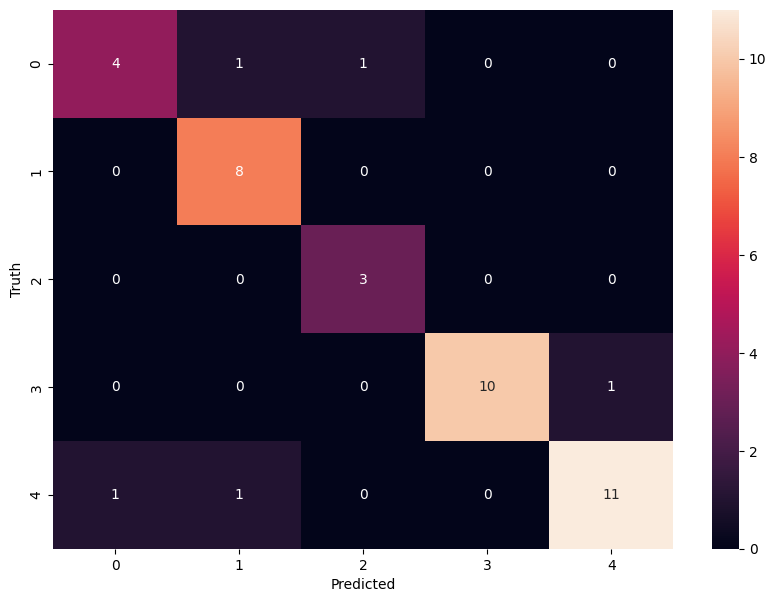

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']